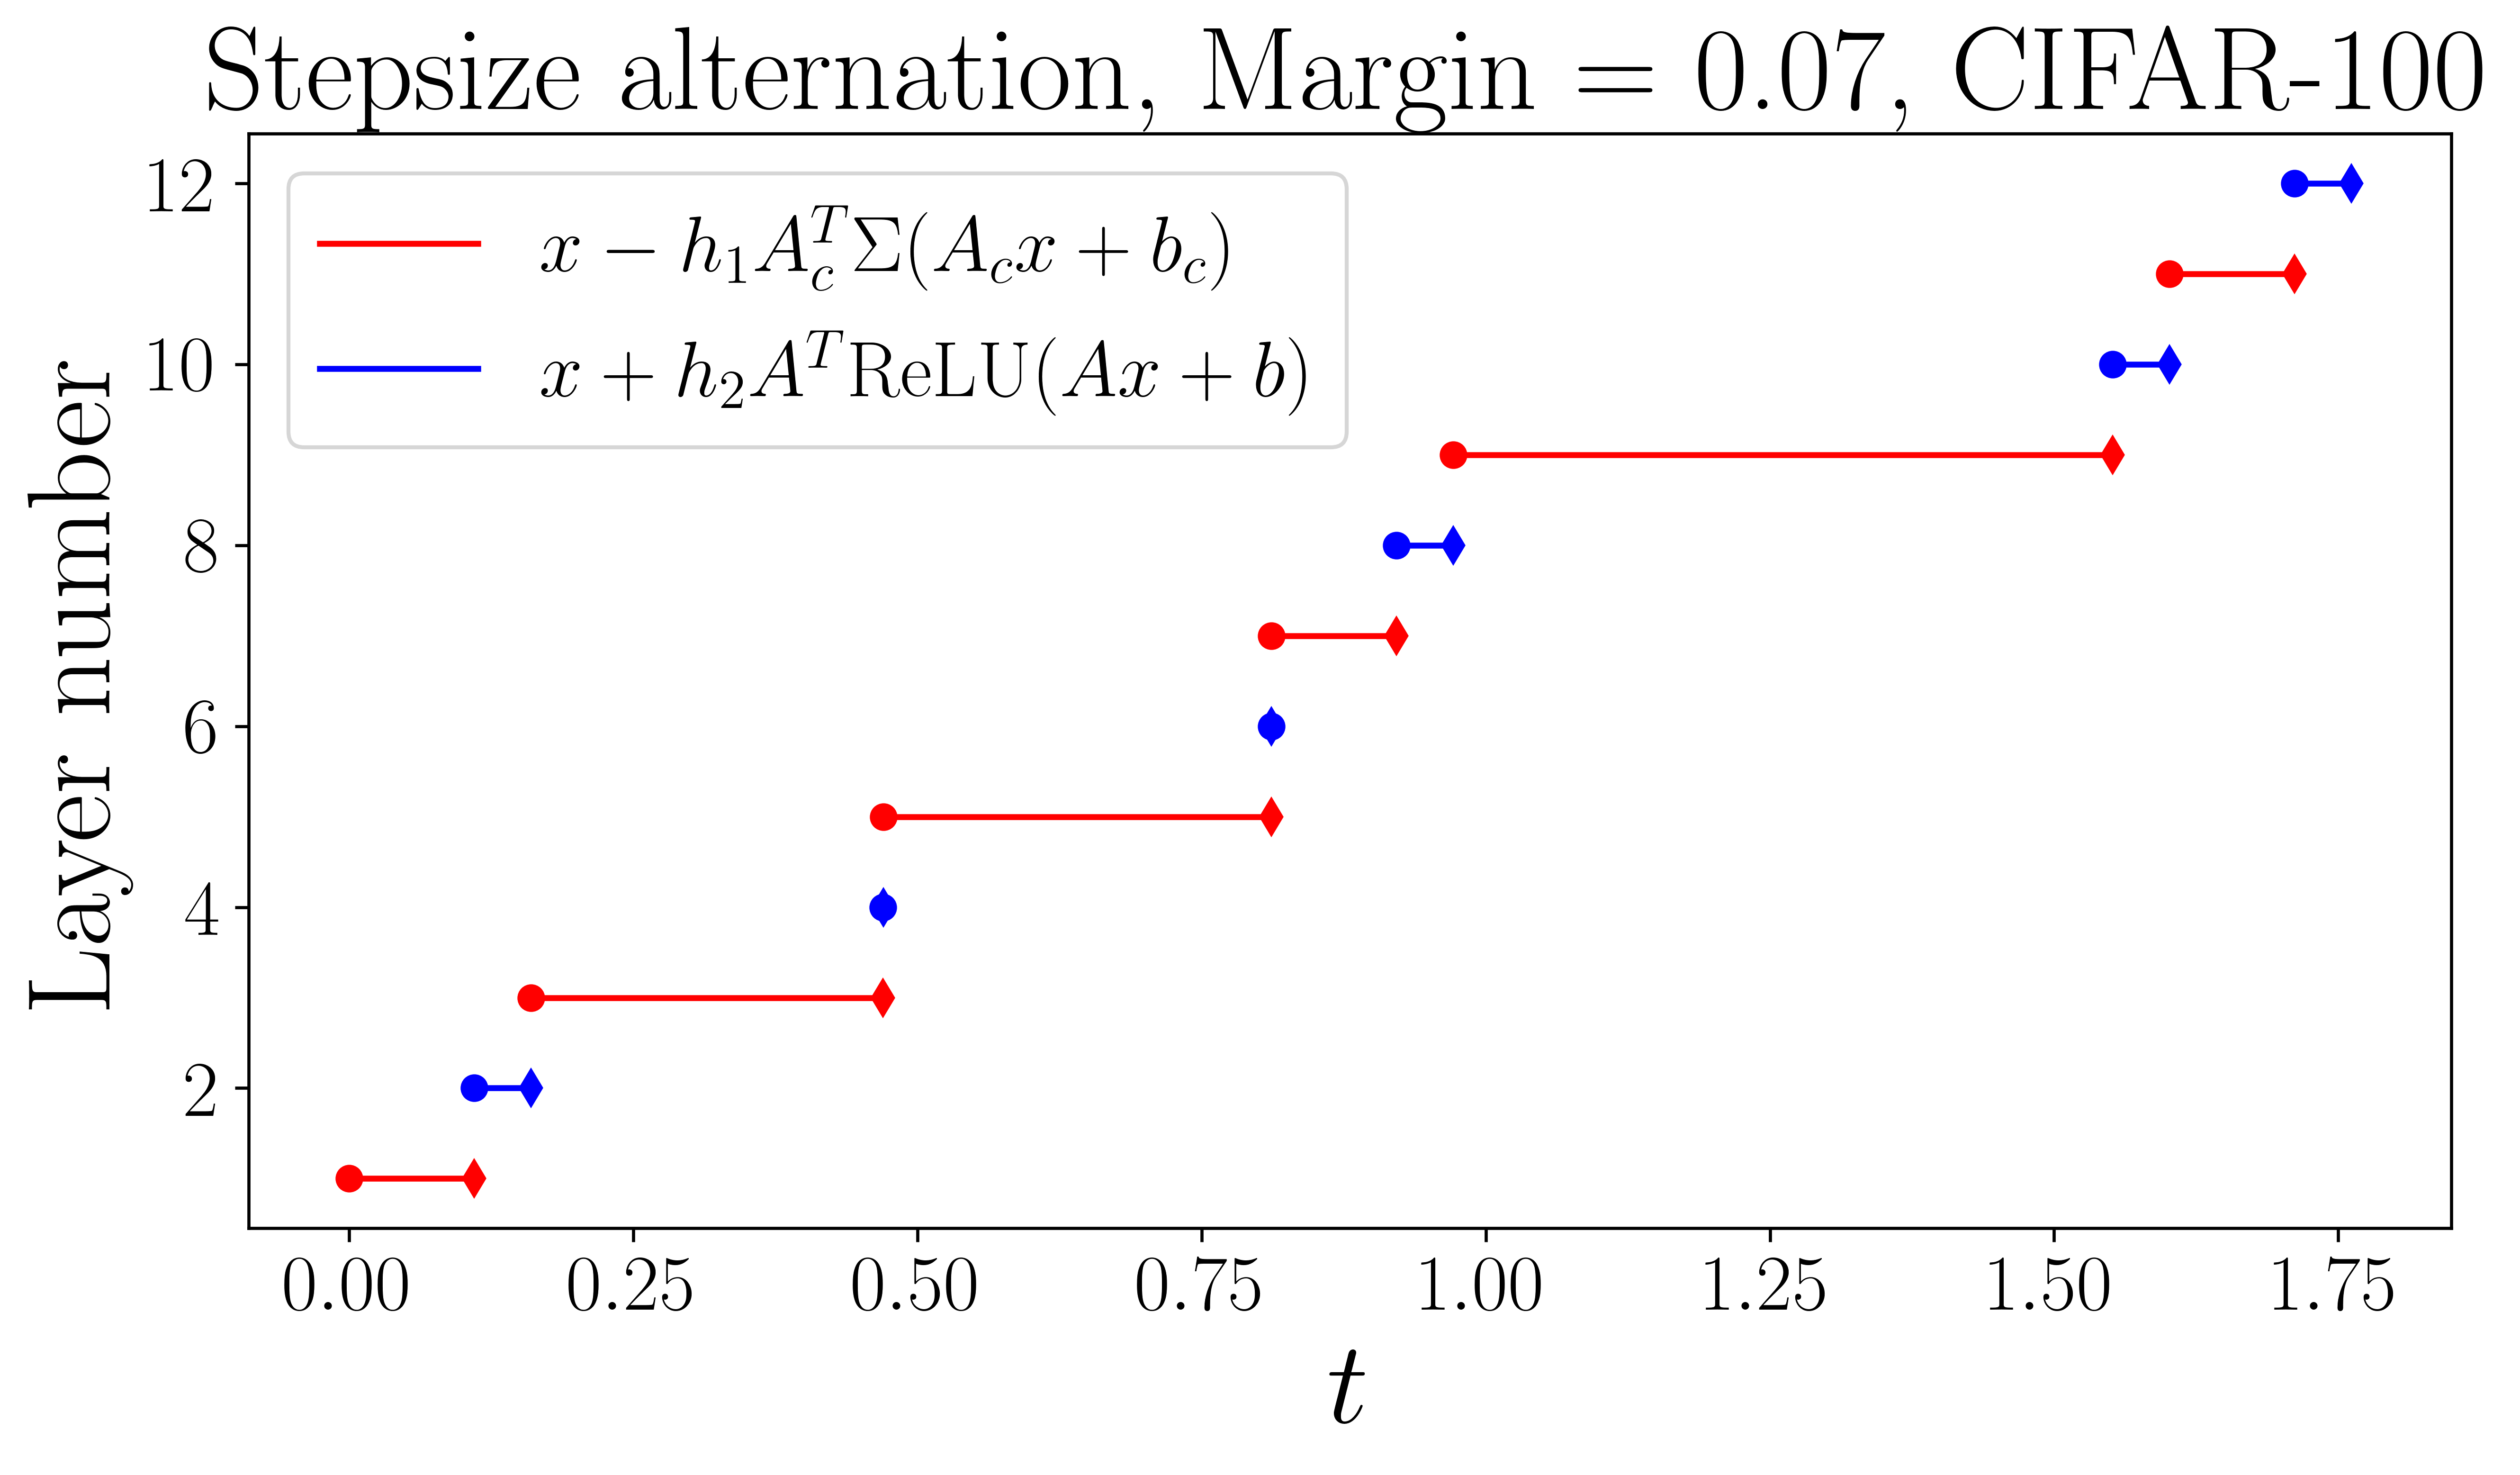

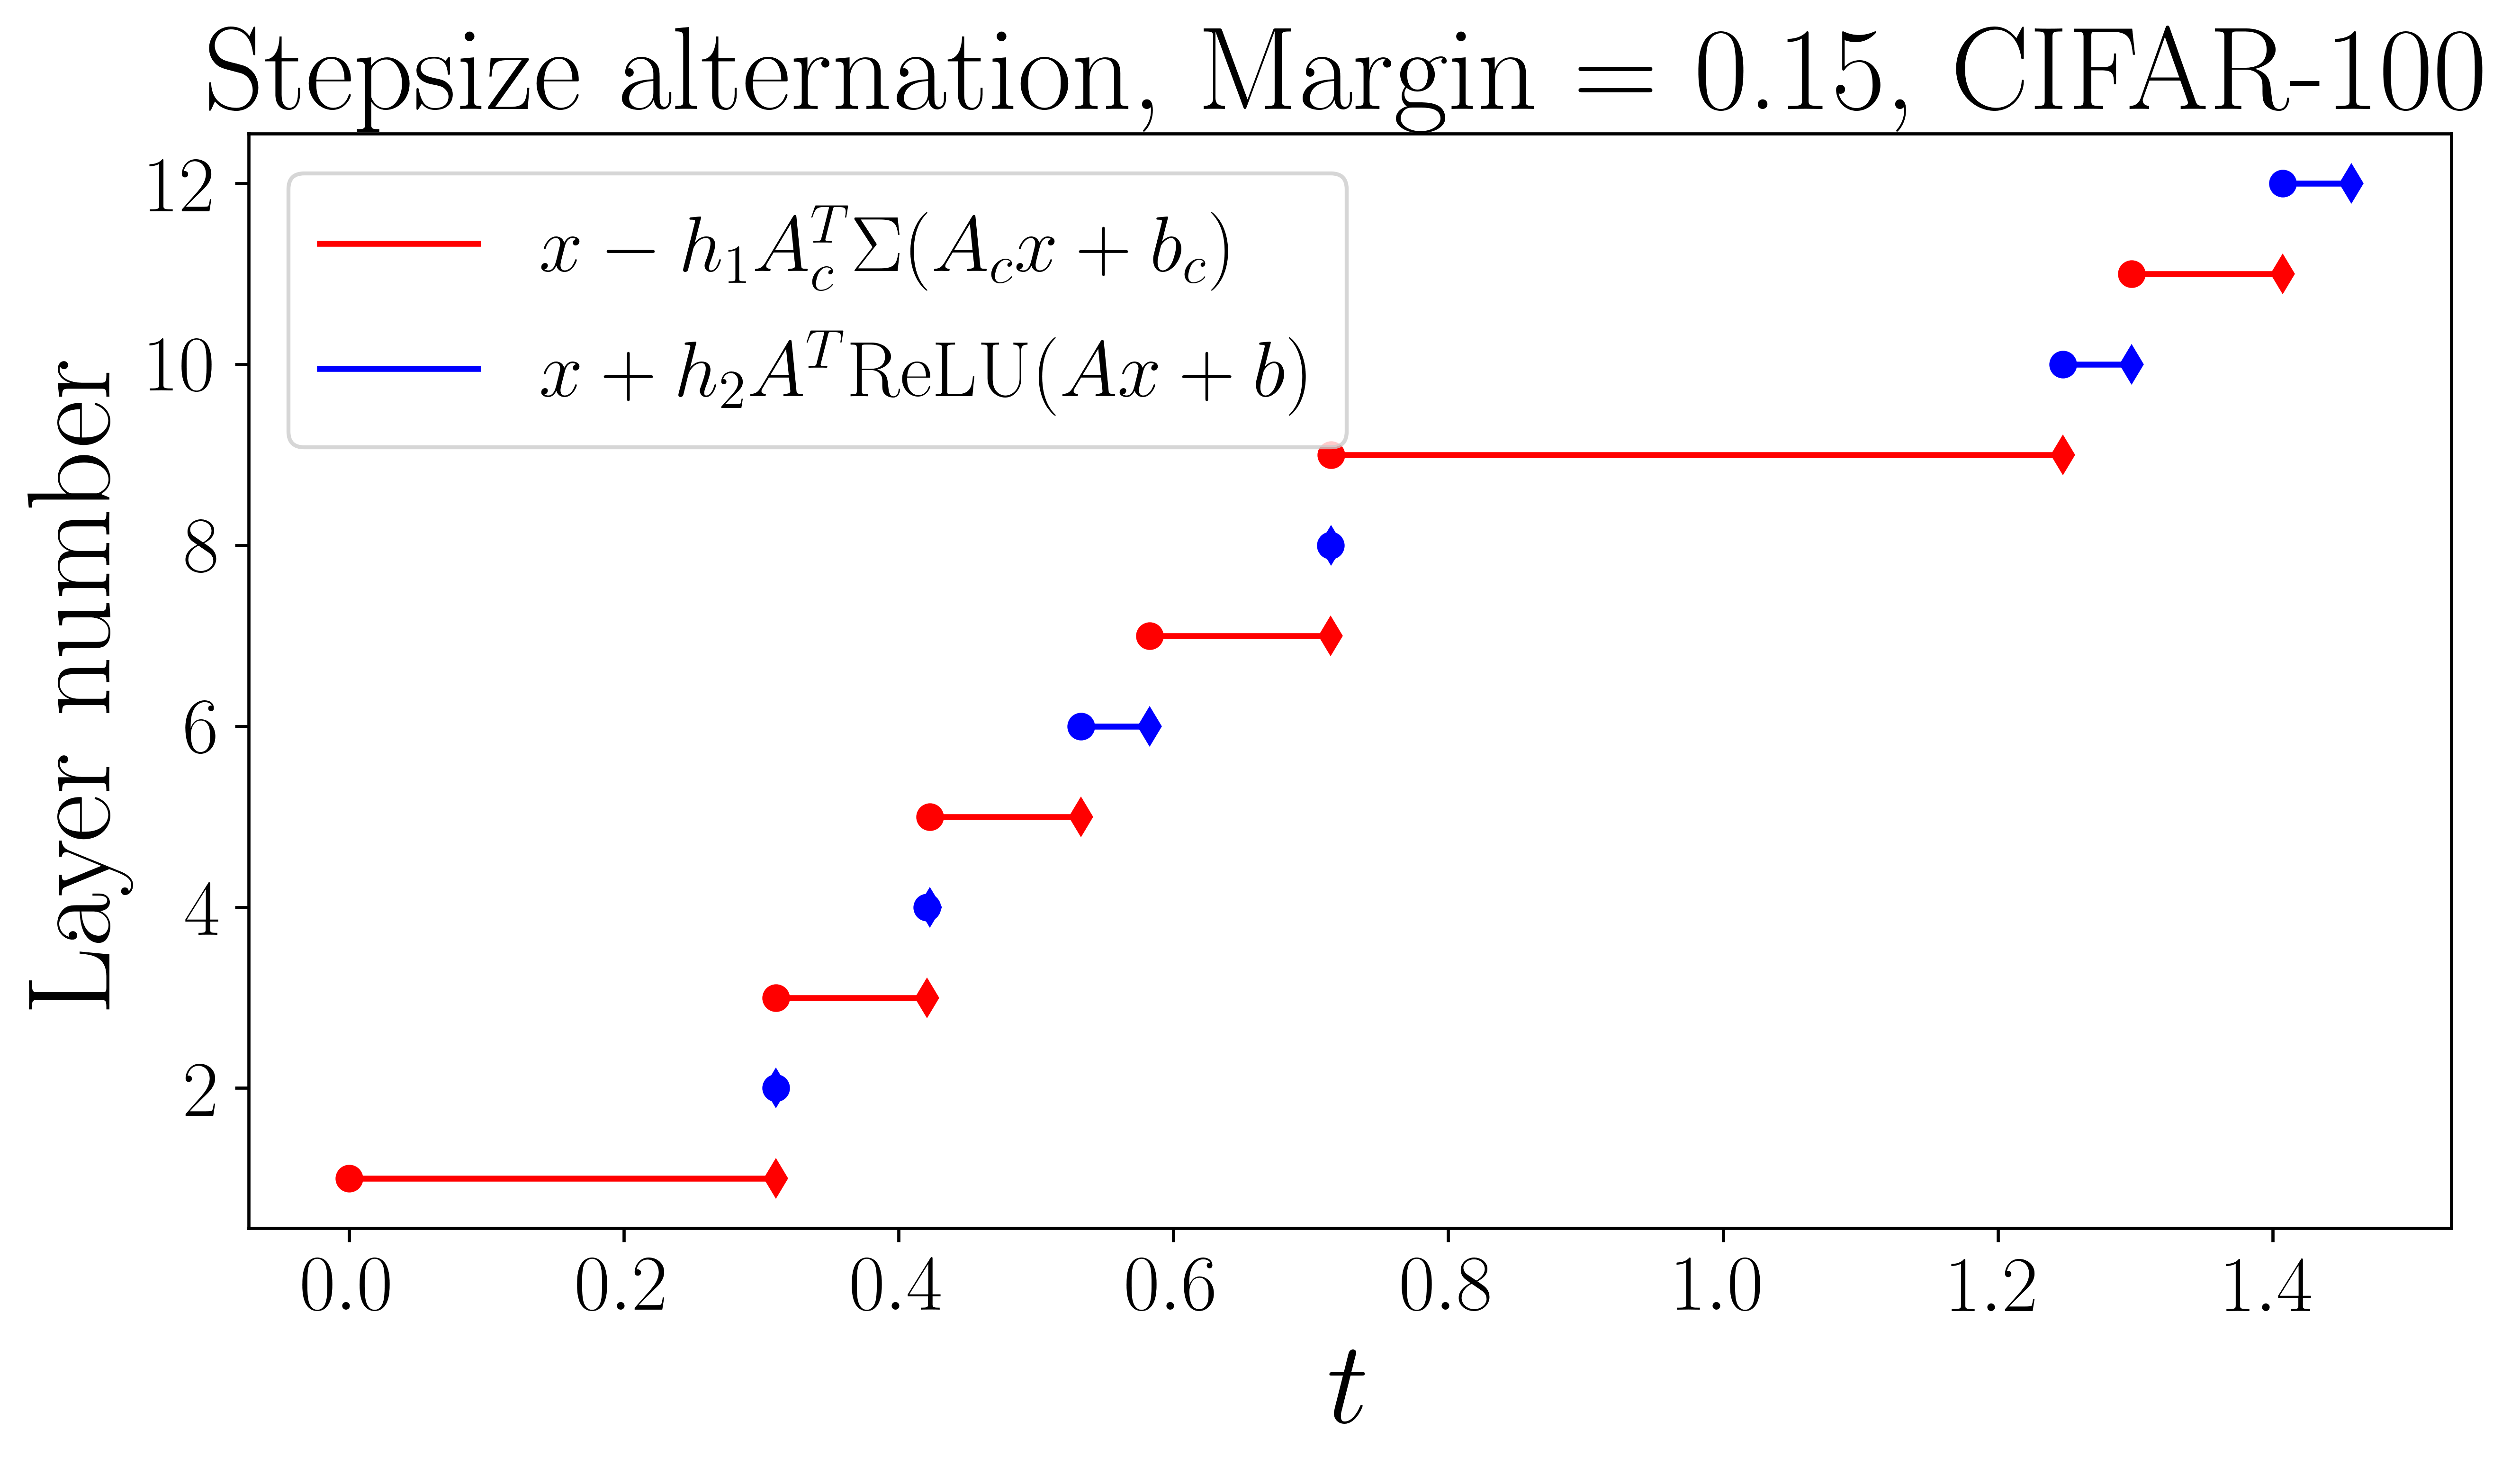

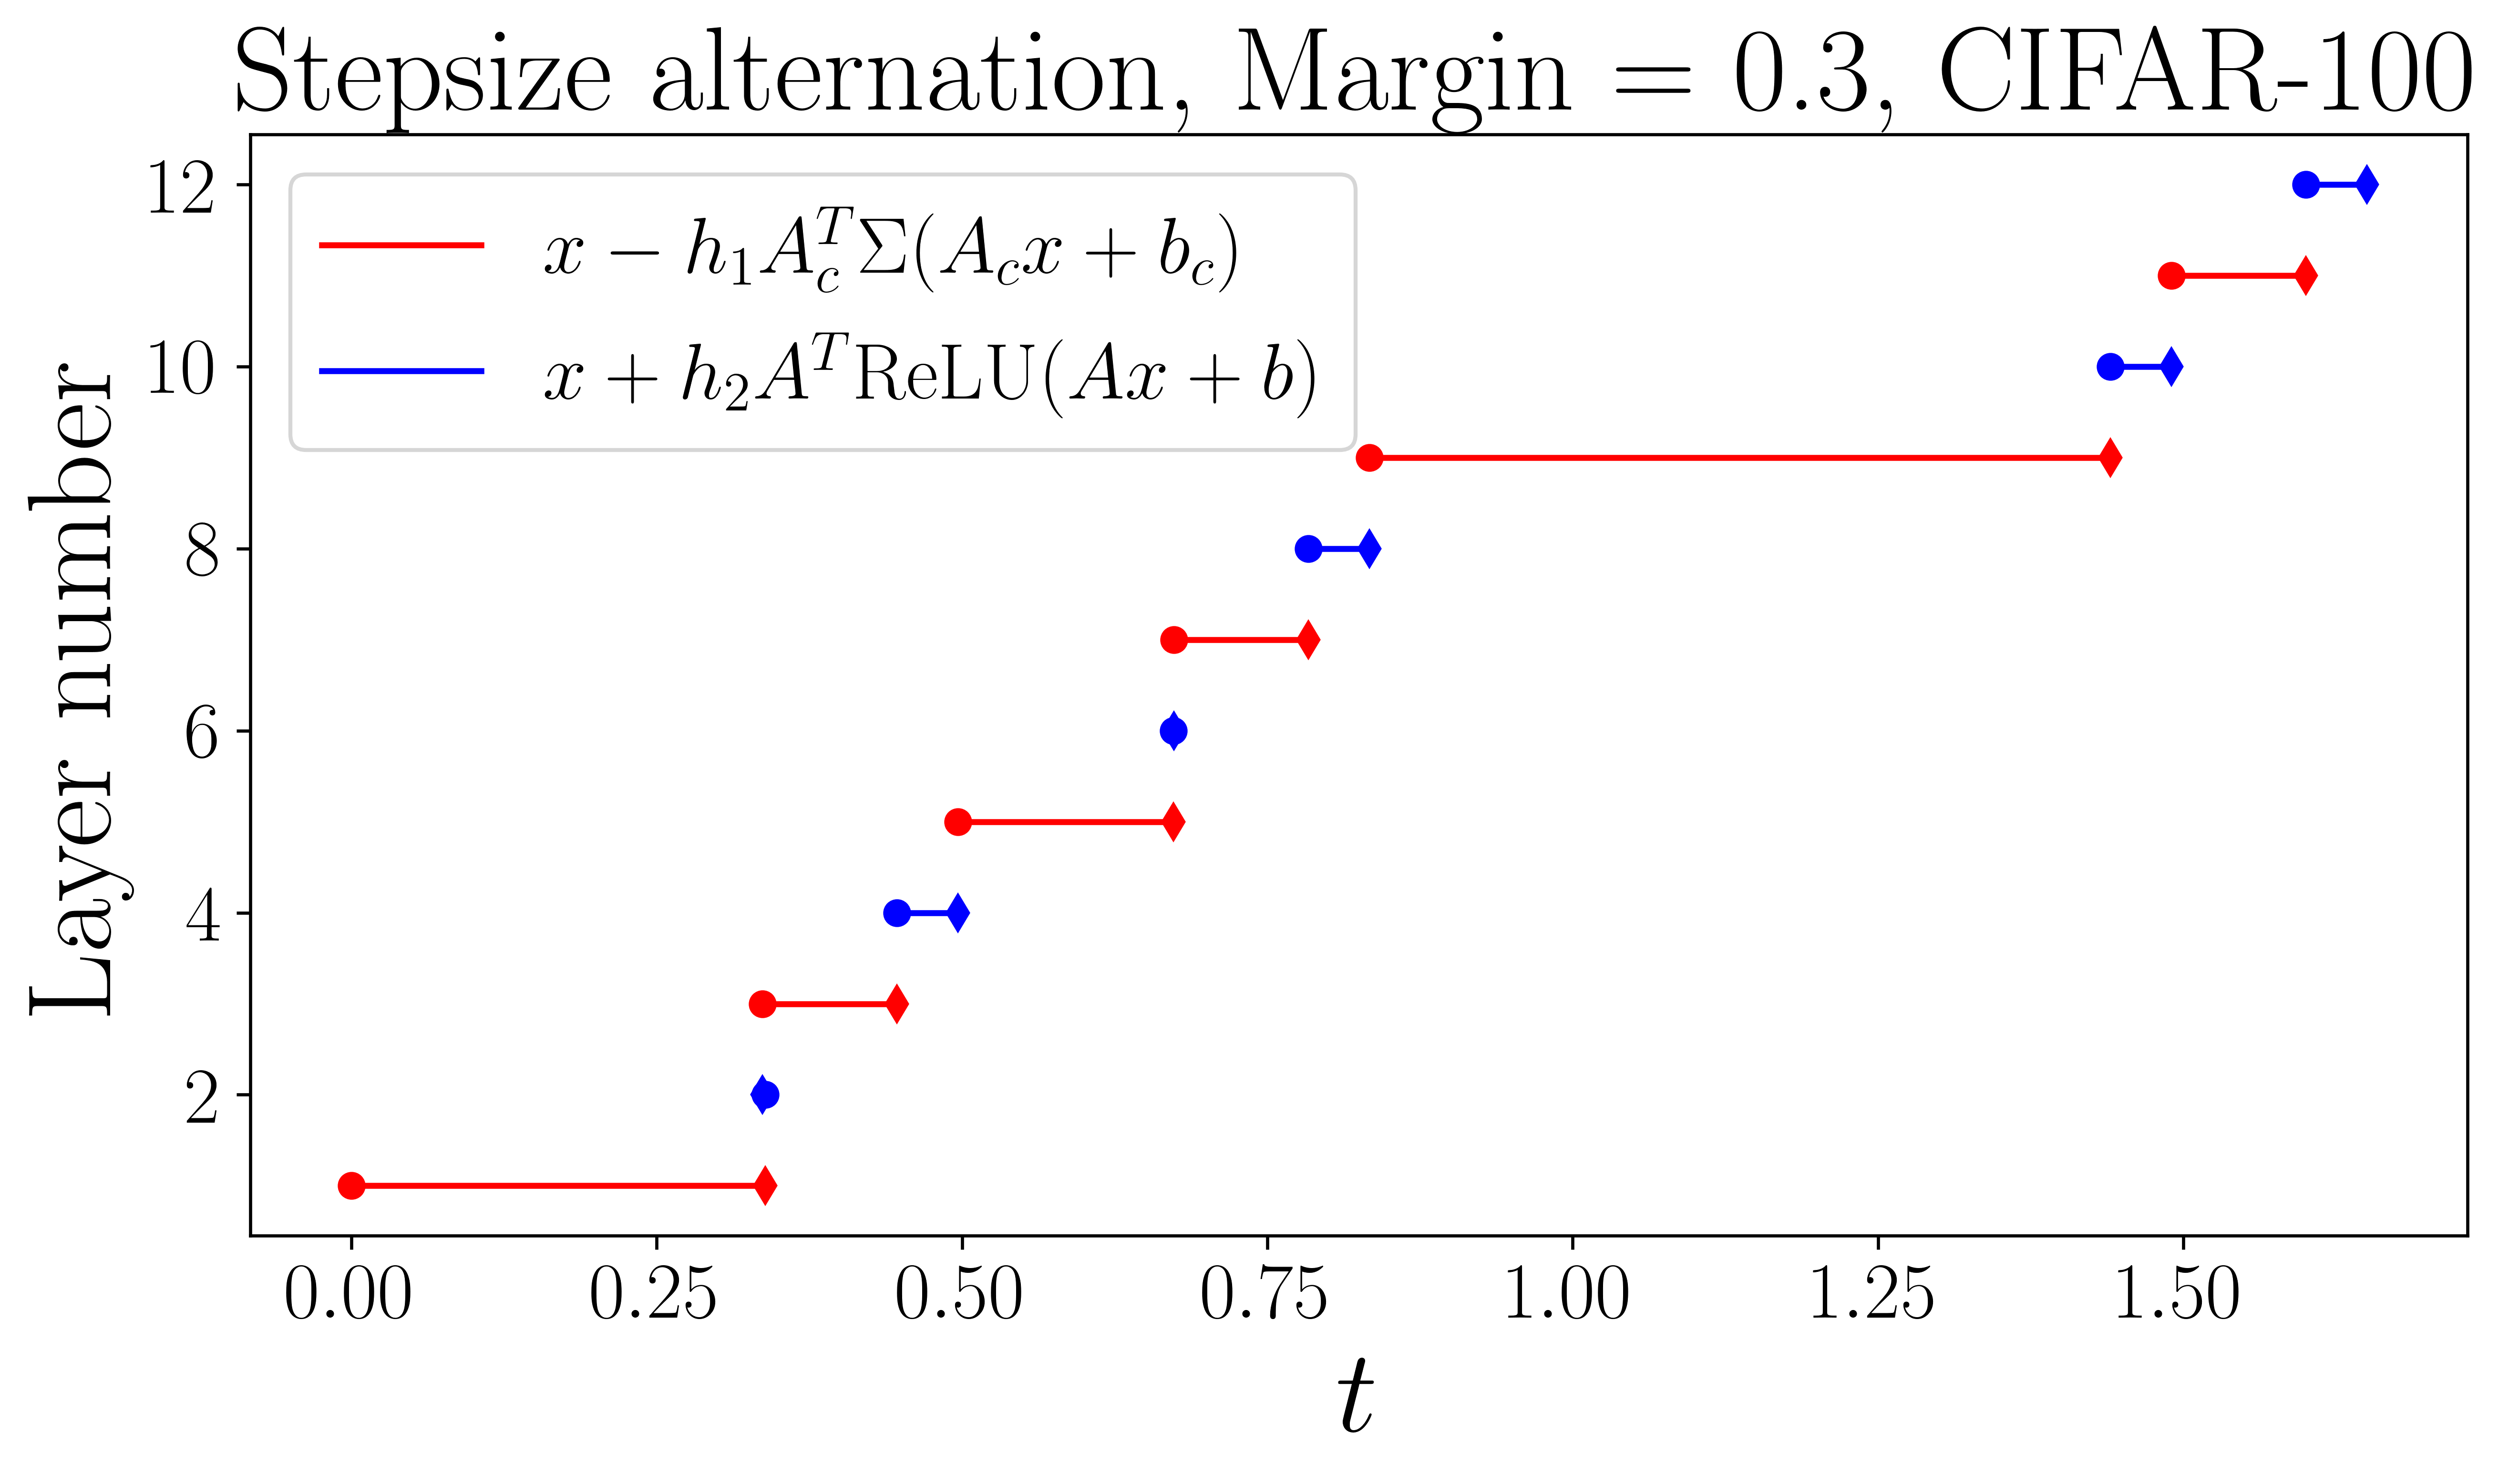

In [2]:
import torch
import torch.nn as nn
import numpy as np
import time
import matplotlib.pyplot as plt

from utils import *
from network import *
from training import *
from multiClassHinge import *

marginList = [0.07, 0.15,0.3]

timeSteps = {
    "Margin 0.07":np.zeros((3,4)),
    "Margin 0.15":np.zeros((3,4)),
    "Margin 0.3":np.zeros((3,4)),
}

a = 0.5
M = 1

for margin in marginList:
    
    model = Network(3,32,64,128,4,4,4,S = 2, a = a, M=M)
    model.load_state_dict(torch.load(f"CertifiedLip_margin_{margin}.pt",map_location='cpu'))

    for k in range(3):
        for s in np.arange(0,model.seq[k].nlayers,2):
            timeSteps[f"Margin {margin}"][k,s] = model.seq[k].u[s]
            timeSteps[f"Margin {margin}"][k,s+1] = model.seq[k].u[s+1]
import matplotlib

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
#matplotlib.rcParams['font.size']=45
#matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.family']= 'ptm' #'Times New Roman'
import matplotlib.pyplot as plt

for margin in marginList:
    mat = timeSteps[f"Margin {margin}"]
    csum = np.cumsum(mat,axis=1)
    csum[1:] += csum[0,-1]
    csum[2:] += csum[1,-1]
    csum = np.concatenate((np.array([0.]),csum.reshape(-1)),axis=0)
    fig = plt.figure(figsize=(10,5),dpi=600)
    colors = ['r','b']
    for j in range(len(csum)-1):
        vv = np.ones(2)
        c = colors[np.mod(j,2)]
        
        if j==0:
            plt.plot(np.array([csum[j],csum[j+1]]),(j+1)*vv,'-',c=c,label=r"$x - h_1 A_c^T\Sigma(A_cx+b_c)$")
        elif j==1:
            plt.plot(np.array([csum[j],csum[j+1]]),(j+1)*vv,'-',c=c,label=r"$x + h_2A^T\mathrm{ReLU}(Ax+b)$")
        else:
            plt.plot(np.array([csum[j],csum[j+1]]),(j+1)*vv,'-',c=c)
        
        plt.plot(np.array([csum[j]]),(j+1)*vv[0],'o',c=c)
        plt.plot(np.array([csum[j+1]]),(j+1)*vv[1],'d',c=c)
        
    plt.title(f"Stepsize alternation, Margin = {margin}, CIFAR-100",fontsize=30)
    plt.xlabel("$t$",fontsize=30)
    plt.ylabel("Layer number",fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=20)
    plt.savefig(f"step_alternation_{margin}_cifar100.pdf",bbox_inches='tight')
    plt.show();